In [79]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from scipy.fft import fft, fftfreq

current_path = os.path.abspath('.')

In [80]:
# Functions
def structure_file(df):
    df = df[0].str.split('\t', n=4, expand=True)

    df.columns = ["time", "sensor", "x", "y", "z"]

    GYR_data = df.loc[df['sensor'] == 'GYR']
    ACC_data = df.loc[df['sensor'] == 'ACC']

    GYR_data.index = GYR_data['time'].apply(pd.to_numeric)
    ACC_data.index = ACC_data['time'].apply(pd.to_numeric)
    GYR_data = GYR_data.drop('sensor', axis=1)
    ACC_data = ACC_data.drop('sensor', axis=1)
    GYR_data.columns = ['time_gyr', "gyr_x", "gyr_y", "gyr_z"]
    ACC_data.columns = ['time_acc', "acc_x", "acc_y", "acc_z"]
    min_idx = np.argmin([ACC_data.shape[0], GYR_data.shape[0]]) 
    max_idx = np.argmax([ACC_data.shape[0], GYR_data.shape[0]])  

    data_acc_gyr = [ACC_data, GYR_data] 
    data_acc_gyr[max_idx] = data_acc_gyr[max_idx].reindex(data_acc_gyr[min_idx].index, method='nearest', tolerance=0.02)
    new_set = pd.concat(data_acc_gyr, axis=1)
    pandas_data = new_set.dropna().reset_index(drop=True)
    pandas_data = pandas_data.apply(pd.to_numeric)
    return pandas_data

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

No handles with labels found to put in legend.


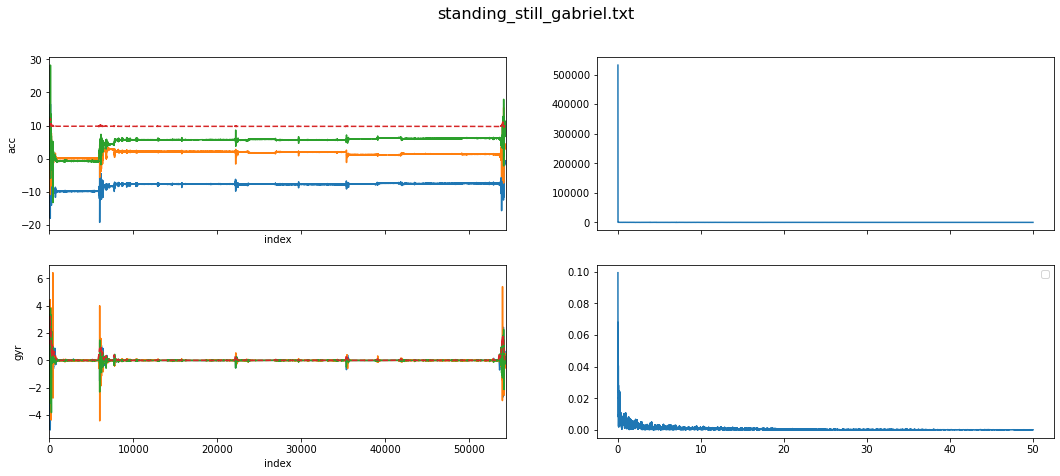

No handles with labels found to put in legend.


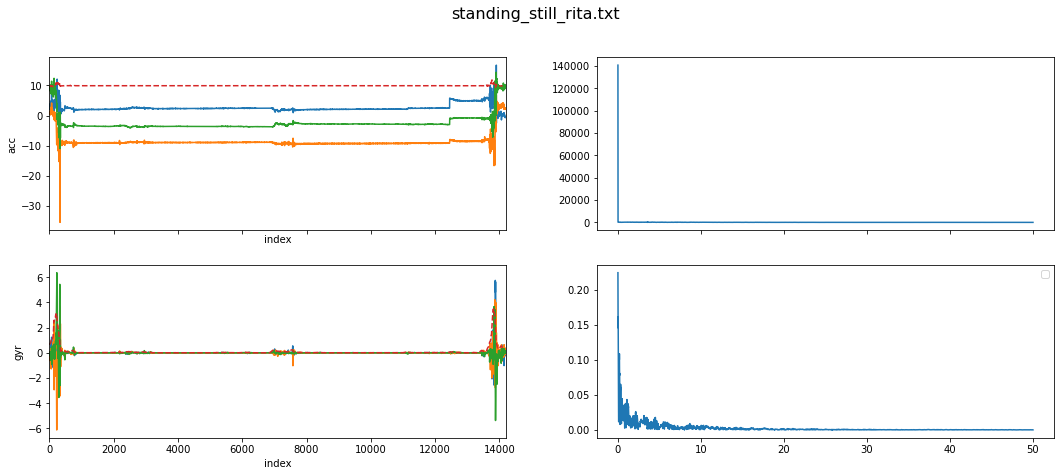

No handles with labels found to put in legend.


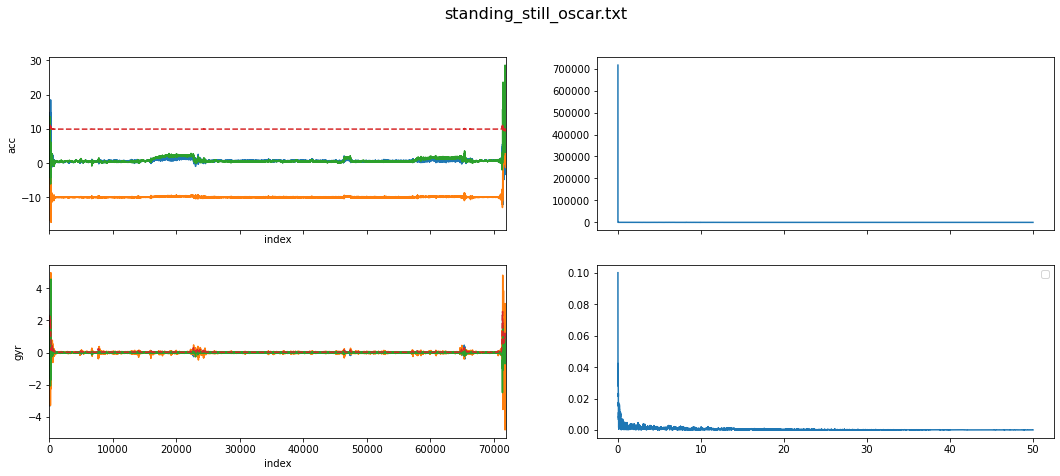

No handles with labels found to put in legend.


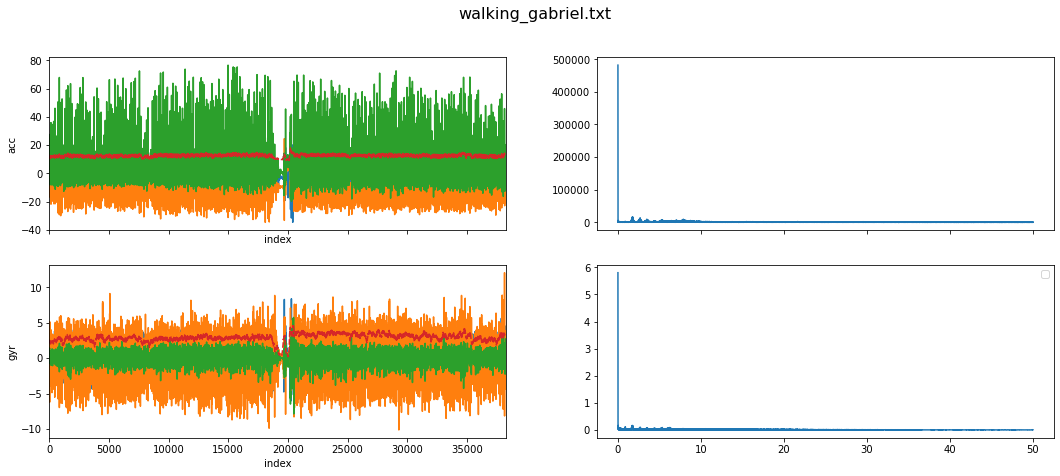

No handles with labels found to put in legend.


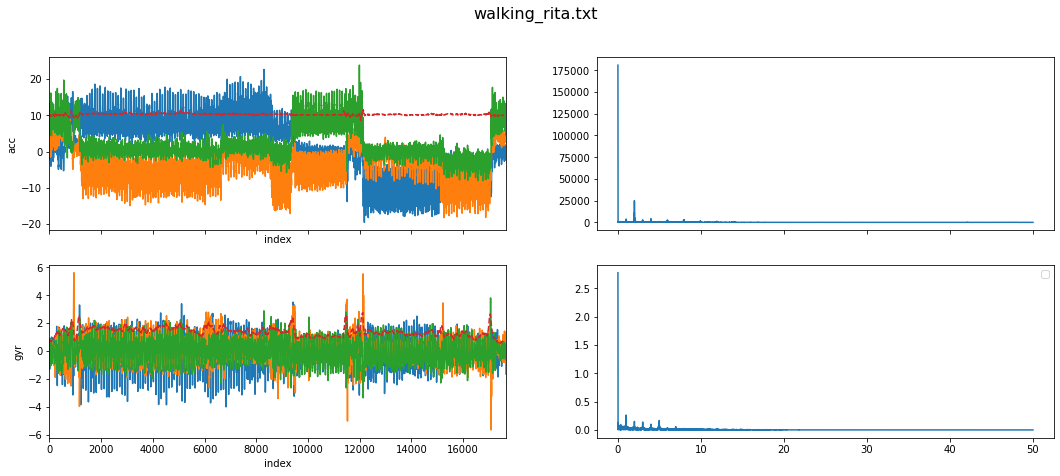

No handles with labels found to put in legend.


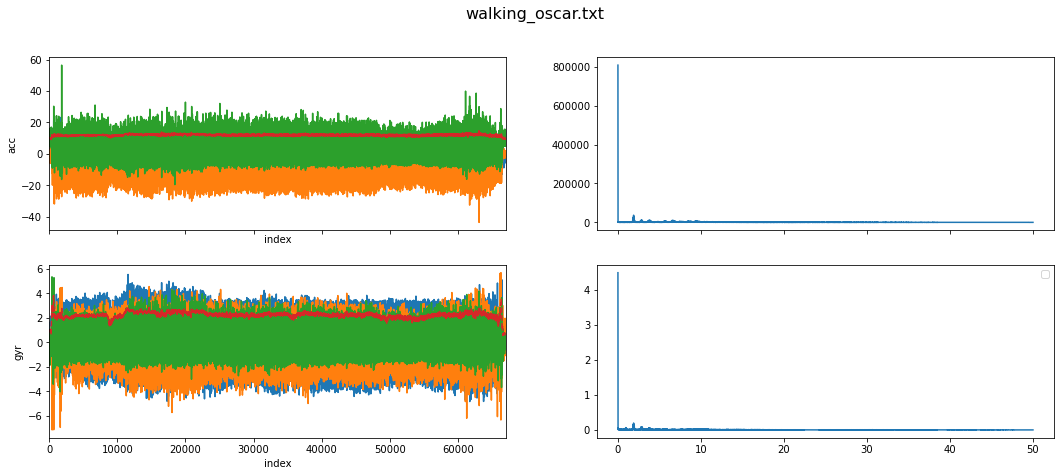

No handles with labels found to put in legend.


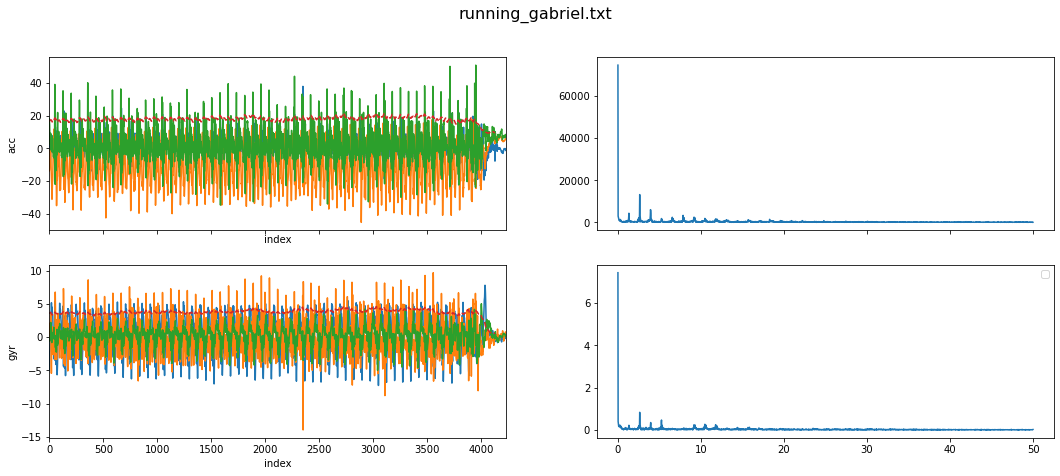

No handles with labels found to put in legend.


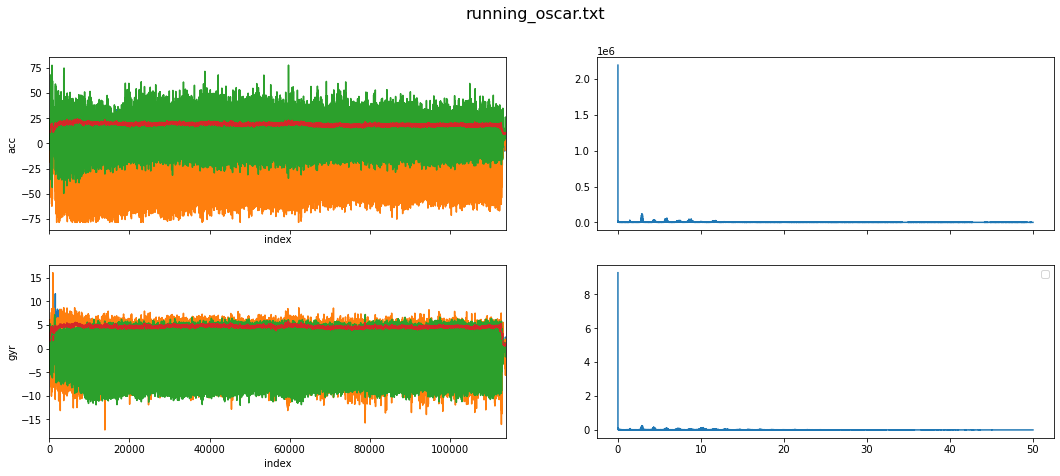

No handles with labels found to put in legend.


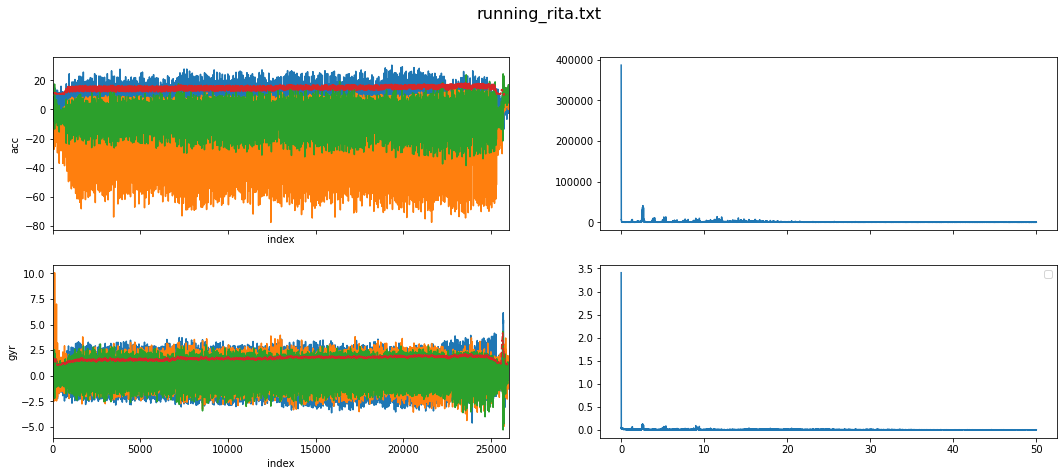

In [81]:
data_types = ["standing_still", "walking", "running"]

for data_type in data_types:
    data_path = os.path.join(current_path, data_type)
    for file in os.listdir(data_path):
        file_path = os.path.join(data_path, file)
        data = pd.read_csv(file_path, header=None)
        pandas_data = structure_file(data)
        # pprint(pandas_data)

        # Compute rms
        rms_acc = np.sqrt(pandas_data['acc_x']**2 + pandas_data['acc_y']**2 + pandas_data['acc_z']**2).to_numpy(dtype=float, copy=True)
        rms_gyr = np.sqrt(pandas_data['gyr_x']**2 + pandas_data['gyr_y']**2 + pandas_data['gyr_z']**2).to_numpy(dtype=float, copy=True)

        # Compute moving average
        rms_acc_ma = moving_average(rms_acc, int(1/0.01))
        rms_gyr_ma = moving_average(rms_gyr, int(1/0.01))

        # Compute fft
        N = len(rms_acc)  # number of sample points
        T = 0.01  # sampling time

        fft_acc = fft(rms_acc)
        fft_gyr = fft(rms_gyr)
        xf = fftfreq(N, T)[:N // 2]

        # Plot data
        fig, ax = plt.subplots(2, 2, sharex='col', figsize=(18, 7))
        fig.suptitle(file, fontsize=16)
        ax[0,0].plot(pandas_data.index, np.array(pandas_data['acc_x']), label='x')
        ax[0,0].plot(pandas_data.index, np.array(pandas_data['acc_y']), label='y')
        ax[0,0].plot(pandas_data.index, np.array(pandas_data['acc_z']), label='z')
        ax[0,0].plot(rms_acc_ma, '--', label='rms_ma')
        ax[0,0].set_xlabel('index')
        ax[0,0].set_ylabel('acc')
        ax[0,1].plot(xf, np.abs(fft_acc[0:N // 2]))
        ax[0,0].margins(x=0)
        ax[1,0].plot(pandas_data.index, np.array(pandas_data['gyr_x']), label='x')
        ax[1,0].plot(pandas_data.index, np.array(pandas_data['gyr_y']), label='y')
        ax[1,0].plot(pandas_data.index, np.array(pandas_data['gyr_z']), label='z')
        ax[1,0].plot(rms_gyr_ma, '--', label='rms_ma')
        ax[1,0].set_xlabel('index')
        ax[1,0].set_ylabel('gyr')
        ax[1,0].margins(x=0)
        ax[1,1].plot(xf, 2.0/N * np.abs(fft_gyr[0:N // 2]))
        plt.legend()
        plt.show()

